## Setup

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline 

from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

## Introduction

## Data Import

In [187]:
# change the path to where you have downloaded the data set

#path = r"C:\Users\RAJI_\Documents\CS\Year 3\Data Mining (Maths)\Assignment2"
path = os.getcwd()
chdir(path)
# set the path to our current working directory
data = pd.read_csv('CreditCard_train.csv', header =1)

## Data Transformation and Exploration

In [188]:
# checking we have the correct data columns and glancing over the data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,12000.500000,165495.986667,1.628250,1.847417,1.55725,35.380458,-0.003125,-0.12350,-0.154750,-0.211667,...,42368.188417,40000.682542,38563.710625,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042,0.223750
std,6928.347566,129128.744855,0.483282,0.780007,0.52208,9.271050,1.123425,1.20058,1.204033,1.166549,...,63070.680934,60345.012766,59155.759799,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990,0.416765
min,1.000000,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6000.750000,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,2340.000000,1740.000000,1234.750000,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000,0.000000
50%,12000.500000,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.00000,0.000000,0.000000,...,18940.500000,18107.500000,17036.000000,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000,0.000000
75%,18000.250000,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.00000,0.000000,0.000000,...,52188.500000,49746.500000,48796.250000,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.00000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


Generally looking at the dataset,from the 24000 sets of data:
* the mean of the the amount of given credit is around 165500, the standard deviation is extremly large and is highly likely because of the max value is 1000000
* the average age is about 36. 
* the male-female ratio is about even (as the mean is 1.6)
* the majority of people graduate from either university or graduate school
* The mean of the "default payment next month" is 0.22, as 0 represents 'non-default' and 1 represents 'default' therefore possibly indicating most of the cases would not default next month


In [189]:
# Let's do a little data visualisation
cols = [ f for f in data.columns if data.dtypes[ f ] != "object" and f!= 'ID']
del cols[-1:]
basicData = cols[1:11]
moneyData = [x for x in cols if x not in basicData]


We see that the values regarding amounts of money are heavily skewed to the left hand side. We can try and elimate this by transforming these features later on.

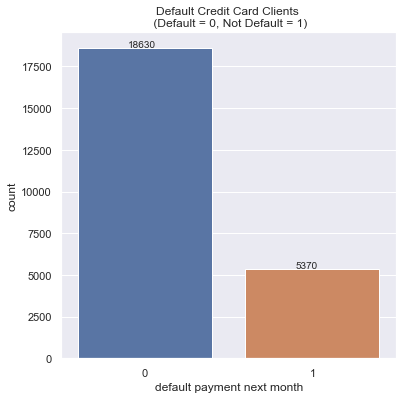

In [190]:
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients \n (Default = 0, Not Default = 1)')
ax = sns.countplot(x="default payment next month", data=data)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

The one in ten rule is a rule of thumb for how many predictors can be derived from data when doing regression analysis without risk of overfitting. The rule states that one predictive variable can be studied for every ten events--minimum 10 events per varible.

A "one in 20 rule" has been introduced, and sometimes considered better than "one in 10 rule" indicating more candidate events for each variable

In our case, firstly we need to get the output variable with the lower value: 5370

Then divide it by the number of variables: 5370/23=233

We definitely have enough number of candidates as the figure is more than 20.

However, it might also indicates the high possibility for overfitting. We would do more exploration of th data to check that.

## Non-machine learning classifiers
There exist some very simple non-machine learning classifiers, for example:

* Random Guess Classifier : In our cases, randomly select 0 and 1 as the output

* Weighted Guess Classifier : randomly assign a % of the data to output 0 and the other 1-a% to 1

* Majority Class Classifier : assign all of the output to the majority  class in the data

These methods are so simple to implement and espically for the cases of logistis regression with only two output labels, the performance would be fairly well. Therefore a machine learning classifier should be smarter and gives better accuracy results than these algorithms.

It looks like that the majority class classifier would perform best on this set of data: 18630/24000=77.6%, so we should use a classifier giving higher accuracy than this

## Data Visualisation

Spliting the dataset into several sectors. Looking at the repayment status records, we draw a count graph for each column:

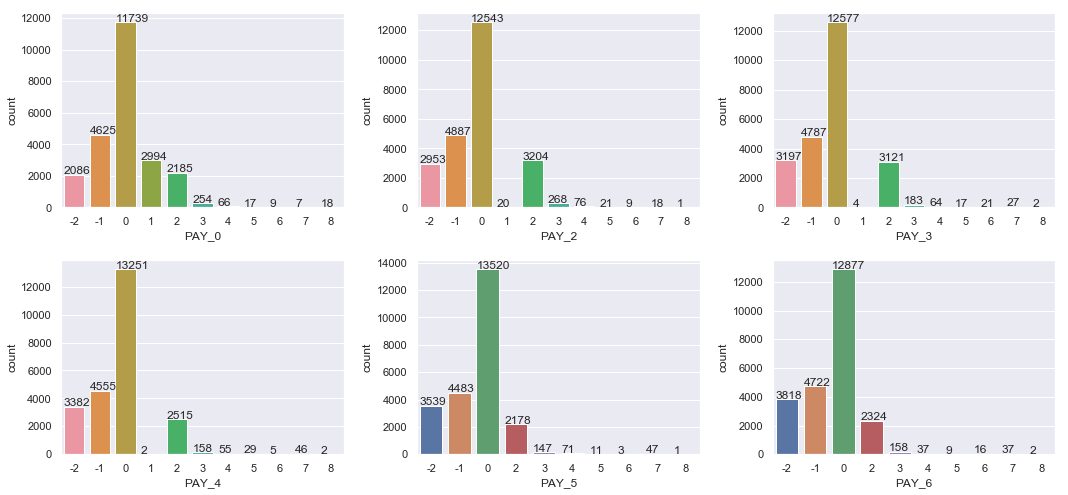

In [191]:
#Repayment Status
sns.set(style="darkgrid")
plt.figure(figsize = (15,10))
i = 0
for c in cols[5:11]:
    i= i+1
    plt.subplot(3,3,i)
    ax = sns.countplot(x=c, data=data)
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
    plt.tight_layout() 

From the countplots, we observe that there are two unknown variables for repayment status:-2 and 0. Technically we should consider these variables as "NA" (Not Applicable). We could either delete these observations or replace the undocumented variables with the most relevant value. However, considering the vast quantity, I think the best idea it to keep those observations as "NAs" and see how does it affect the predicted output.


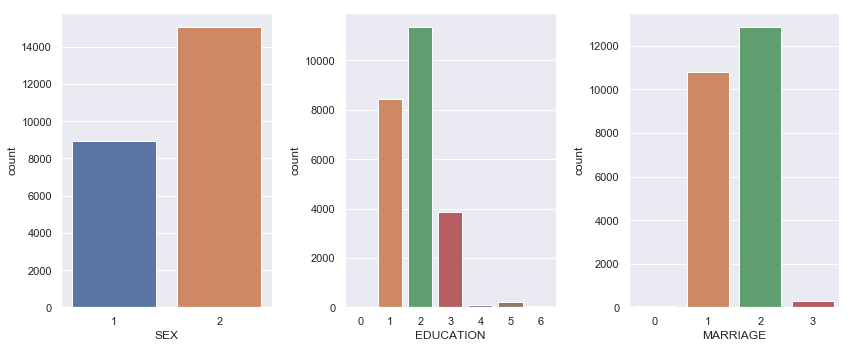

In [192]:
#Social Status(SEX, EDUCATION, MARRIAGE)

figs, axs = plt.subplots(1, 3, figsize=(12, 5))
axs = axs.ravel()

for counter in range(3):
    col = data.columns[2+counter]
    sns.set(style="darkgrid")
    sns.countplot(x=str(col), data=data,ax=axs[counter])


plt.tight_layout()
plt.show()


We summerise the sex, marriage and eduation as the social status sector. Again we notice that there are obervations with several undocumented values. For example, 0,5 and 6 for education. As I stated before, we could classify those as NA and  keep them as it is for now.

In [193]:
#check the inter-quartile range of the data 
print(data.AGE.quantile([0.25,0.5,0.75]))

0.25    28.0
0.50    34.0
0.75    41.0
Name: AGE, dtype: float64


One definition of outlier is any data point more than 1.5 inter-quartile range(IQR) below Q1 or above Q3. The IQR is 13, therefore outliers are points lying above 60.5 and below 8.5


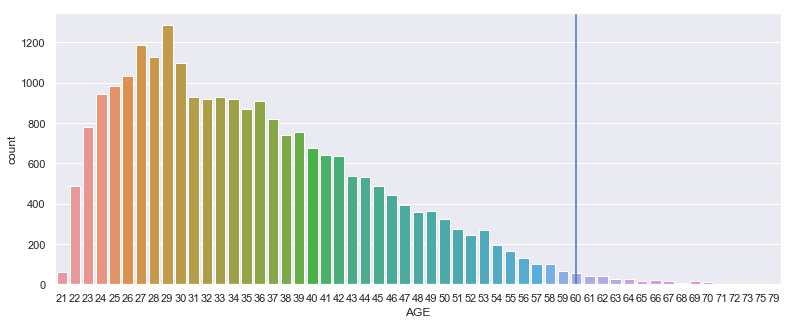

In [194]:
#Age 
plt.figure(figsize=(13,5))
col = data.columns[5]
sns.set(style="darkgrid")
ax=sns.countplot(x=str(col), data=data)
plt.axvline(x=39)
plt.show()

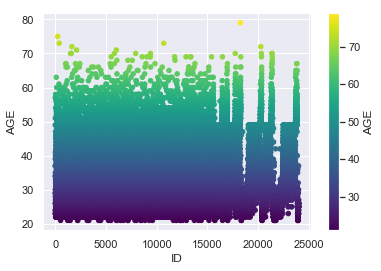

In [195]:
#Age Scatter
fig, ax = plt.subplots()
data.plot.scatter(x='ID', y='AGE',c='AGE', cmap='viridis',ax=ax)
plt.show()

From the scatter plot, the strange thing is that with index more than 15000, the structure of the data seems like to have some kind of periodic patterns. To make sure that data with index more than 15000 is valid, we have drawed another histogram to analyse the strcture of the data.

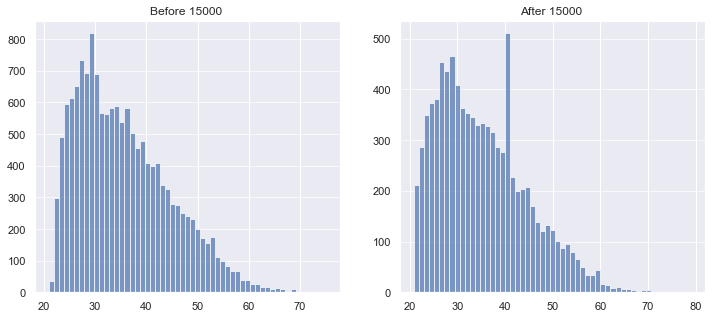

In [196]:
#comparing 2 groups
figs, axs = plt.subplots(1, 2, figsize=(12, 5))
#before 15000
col = data.columns[5]
distinct=len(data[col].unique())
axs[0].hist(data[col][:15000], bins=distinct,alpha=0.7)
axs[0].grid(axis='y',alpha=0.75)
axs[0].set_title("Before 15000 ")

#after 15000
col = data.columns[5]
distinct=len(data[col].unique())
axs[1].hist(data[col][15000:], bins=distinct,alpha=0.7)
axs[1].grid(axis='y',alpha=0.75)
axs[1].set_title("After 15000 ")

plt.show()

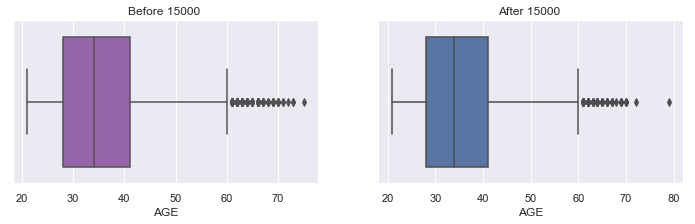

In [197]:
#figs, axs = plt.subplots(1, 2, figsize=(12, 3))
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
ax =sns.boxplot(x=data[col][:15000],color="#9b59b6").set_title("Before 15000 ")
plt.subplot(1,2,2)
ax = sns.boxplot(x=data[col][15000:]).set_title("After 15000 ")

plt.show()

Text(0.5,1,'After 15000 ')

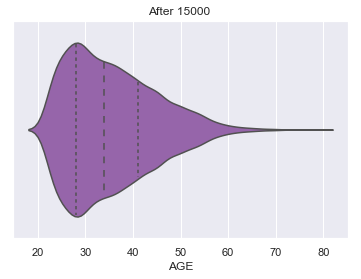

In [198]:
sns.violinplot(x=data[col][15000:],inner="quartile",data=data,color="#9b59b6").set_title("After 15000 ")

Text(0.5,1,'Before 15000 ')

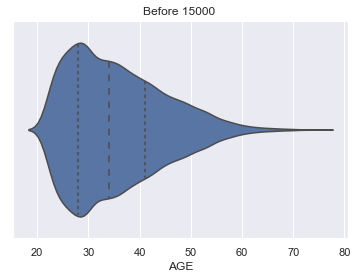

In [199]:
sns.violinplot(x=data[col][:15000],inner="quartile",data=data).set_title("Before 15000 ")

 Both parts of the data hava the same structure and density, therefore the second part of the data is valid 

In [200]:
#Amount of bill statement:
for c in range(1,7):
    string="BILL_AMT"+str(c)
    print(data[string].quantile([0.25,0.5,0.75]))

0.25     3631.5
0.50    22330.0
0.75    65779.5
Name: BILL_AMT1, dtype: float64
0.25     3098.50
0.50    21339.00
0.75    62761.25
Name: BILL_AMT2, dtype: float64
0.25     2773.5
0.50    20039.0
0.75    59298.0
Name: BILL_AMT3, dtype: float64
0.25     2340.0
0.50    18940.5
0.75    52188.5
Name: BILL_AMT4, dtype: float64
0.25     1740.0
0.50    18107.5
0.75    49746.5
Name: BILL_AMT5, dtype: float64
0.25     1234.75
0.50    17036.00
0.75    48796.25
Name: BILL_AMT6, dtype: float64


Again by making use of the definition of outlier:
 >Q3+1.5∗IQR or <Q1−1.5∗IQR


In the graphs belows, we add two imaginary lines indicting the lower bound and upeer bound for outliers

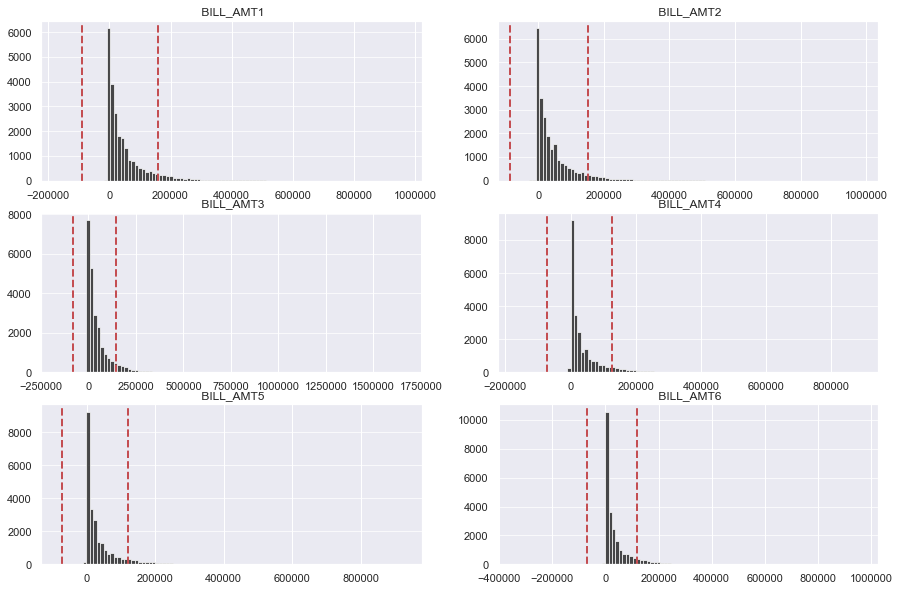

In [201]:
figs, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.ravel()
for counter in range(6):
    col = data.columns[12 + counter]
    l,h=data[col].quantile([0.25,0.75])
    rang=1.5*(h-l)
    low=l-rang
    high=h+rang
    distinct=len(data[col].unique())
    axs[counter].hist(data[col], bins=100,color='black',alpha=0.7,rwidth=1.5)
    axs[counter].axvline(x=low, color='r', linestyle='dashed', linewidth=2)
    axs[counter].axvline(x=high, color='r', linestyle='dashed', linewidth=2)
    axs[counter].grid(axis='y',alpha=0.75)
    axs[counter].set_title(" "+col)
plt.show()

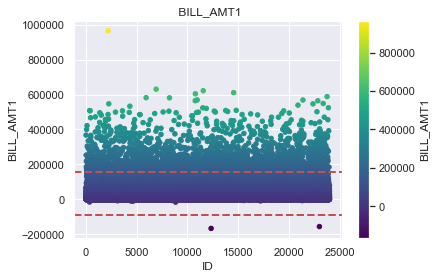

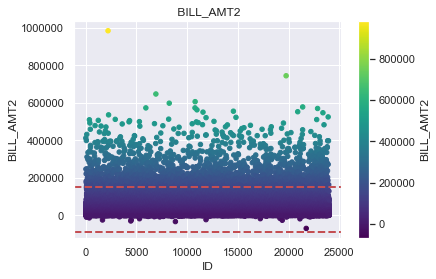

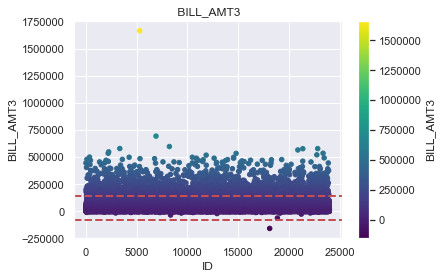

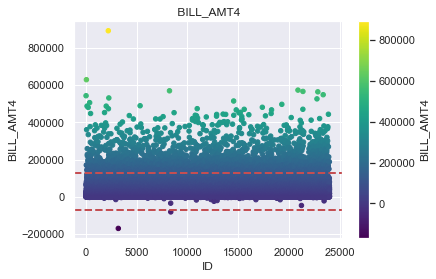

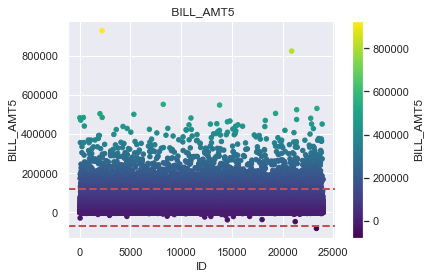

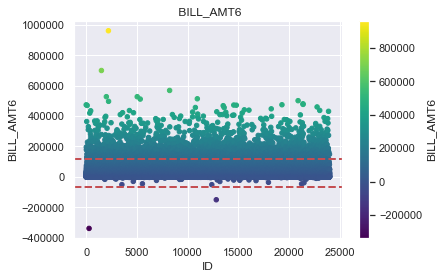

In [202]:
#figs, axs = plt.subplots(3, 2, figsize=(15, 10))
#axs = axs.ravel()

for counter in range(6):
    fig, ax = plt.subplots()
    col = data.columns[12+counter]
    l,h=data[col].quantile([0.25,0.75])
    rang=1.5*(h-l)
    low=l-rang
    high=h+rang
    data.plot.scatter(x='ID', y=col,c=col, cmap='viridis',ax=ax).set_title(" "+col)
    ax.axhline(y=low, color='r', linestyle='dashed', linewidth=2)
    ax.axhline(y=high, color='r', linestyle='dashed', linewidth=2)

plt.show()

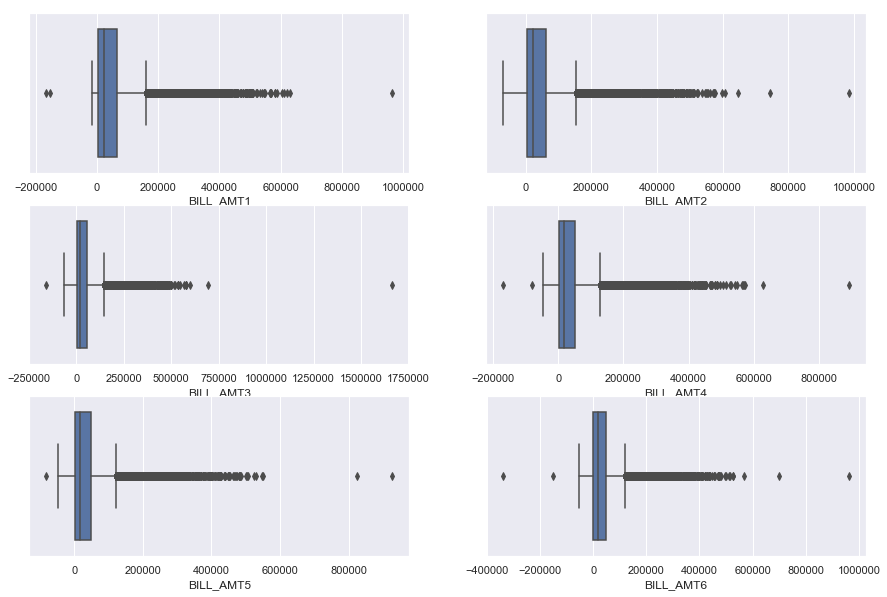

In [203]:
figs, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.ravel()
for counter in range(6):
    col = data.columns[12+counter]
    sns.boxplot(x=data[col],ax=axs[counter])
plt.show()


It looks like our current definition of outlier has a very limited range. The first solution is to give a higher bound for outliers, for example we could define Q3*1.5 IQR +300000 as the higher bound for outliers. Secondly we could also do some data tranformtion to this data. I would suggest try taking the log of the data because of negative values or set the upper bound to Q3*1.5 IQR +300000. 

In [204]:
#Amount of previous payment
for c in range(1,7):
    string="PAY_AMT"+str(c)
    print(data[string].quantile([0.25,0.5,0.75]))

0.25    1000.0
0.50    2100.0
0.75    5000.0
Name: PAY_AMT1, dtype: float64
0.25     800.0
0.50    2000.0
0.75    5000.0
Name: PAY_AMT2, dtype: float64
0.25     379.00
0.50    1702.50
0.75    4347.25
Name: PAY_AMT3, dtype: float64
0.25     279.75
0.50    1500.00
0.75    4000.00
Name: PAY_AMT4, dtype: float64
0.25     244.0
0.50    1500.0
0.75    4005.0
Name: PAY_AMT5, dtype: float64
0.25      60.75
0.50    1500.00
0.75    4000.00
Name: PAY_AMT6, dtype: float64


For this sector, we do not have any more negative values now and use the same method as before

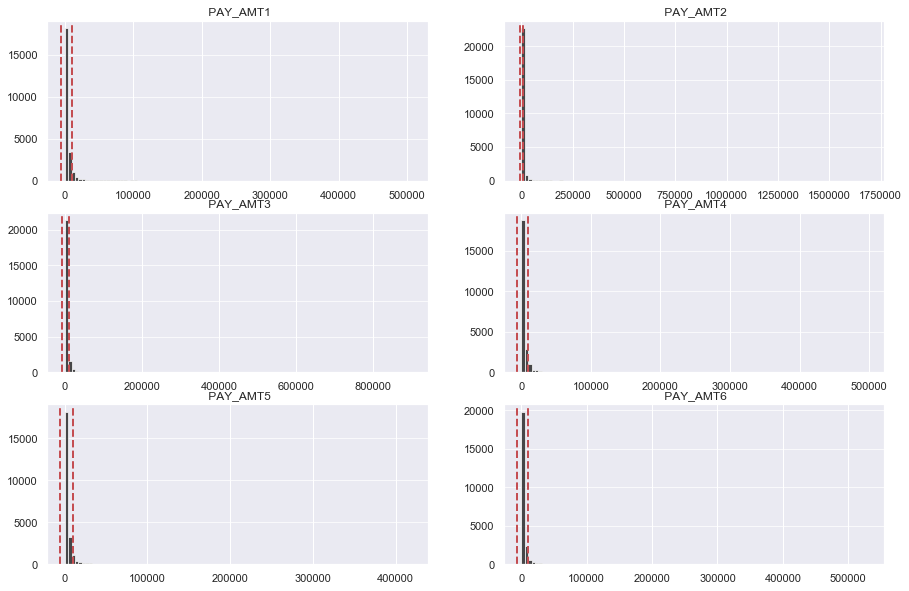

In [205]:
figs, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.ravel()
for counter in range(6):
    col = data.columns[18 + counter]
    l,h=data[col].quantile([0.25,0.75])
    rang=1.5*(h-l)
    low=l-rang
    high=h+rang
    distinct=len(data[col].unique())
    axs[counter].hist(data[col], bins=100,color='black',alpha=0.7,rwidth=1.5)
    axs[counter].axvline(x=low, color='r', linestyle='dashed', linewidth=2)
    axs[counter].axvline(x=high, color='r', linestyle='dashed', linewidth=2)
    axs[counter].grid(axis='y',alpha=0.75)
    axs[counter].set_title(" "+col)
plt.show()

Obviously we could discard our lower bound for outliers as all the data is positive

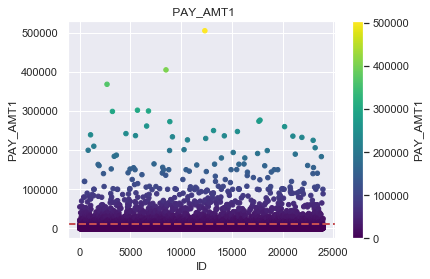

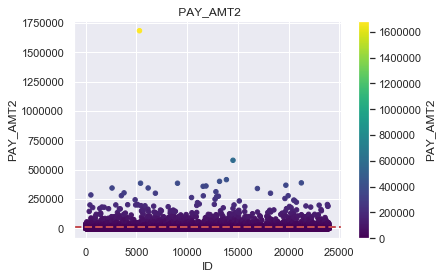

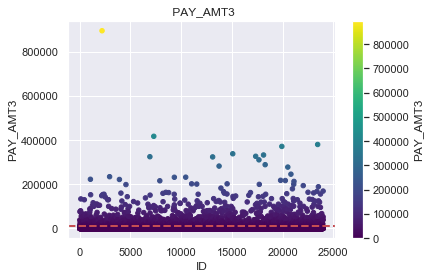

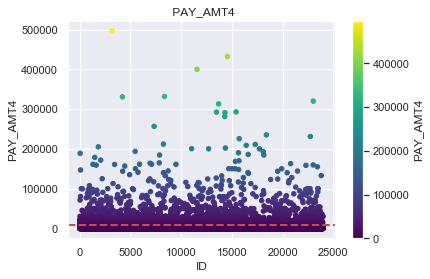

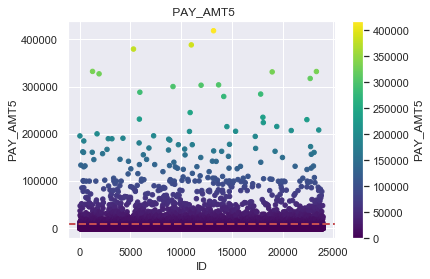

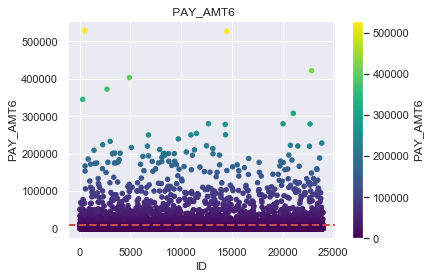

In [206]:
for counter in range(6):
    fig, ax = plt.subplots()
    col = data.columns[18+counter]
    l,h=data[col].quantile([0.25,0.75])
    rang=1.5*(h-l)
    low=l-rang
    high=h+rang
    data.plot.scatter(x='ID', y=col,c=col, cmap='viridis',ax=ax).set_title(" "+col)
    ax.axhline(y=high, color='r', linestyle='dashed', linewidth=2)

plt.show()

Our current upper bound for outliers seems like it too low for this set of data

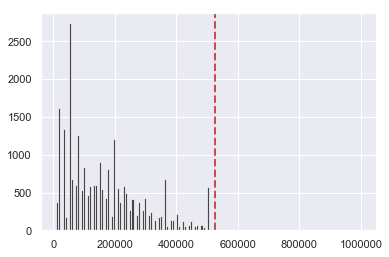

In [207]:
#Limit Balance
col = data.columns[1]
l,h=data[col].quantile([0.25,0.75])
rang=1.5*(h-l)
low=l-rang
high=h+rang
distinct=len(data[col].unique())
plt.hist(data[col], bins=150,color='black',alpha=0.7,rwidth=1.5)
plt.axvline(x=high, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [208]:
   print(data["LIMIT_BAL"].quantile([0,0.25,0.5,0.75,1]))

0.00      10000.0
0.25      50000.0
0.50     140000.0
0.75     240000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64


Remove the outliers and transfer the data back the original form

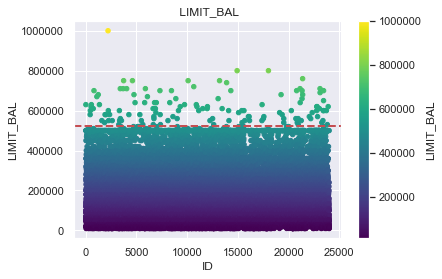

In [209]:
fig, ax = plt.subplots()
col = data.columns[1]
l,h=data[col].quantile([0.25,0.75])
rang=1.5*(h-l)
low=l-rang
high=h+rang
data.plot.scatter(x='ID', y=col,c=col, cmap='viridis',ax=ax).set_title(" "+col)
ax.axhline(y=high, color='r', linestyle='dashed', linewidth=2)

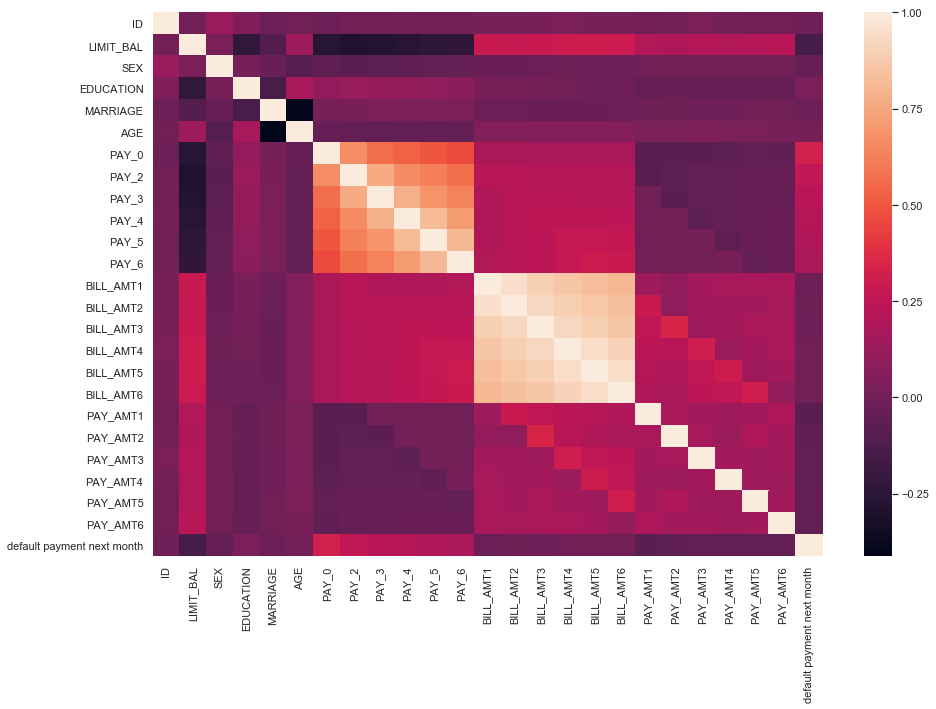

In [210]:
corr = data.corr()
plt.subplots(figsize=(15,10))
from seaborn import heatmap
ax = heatmap(corr)
plt.show()

Columms: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Basic ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Money ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


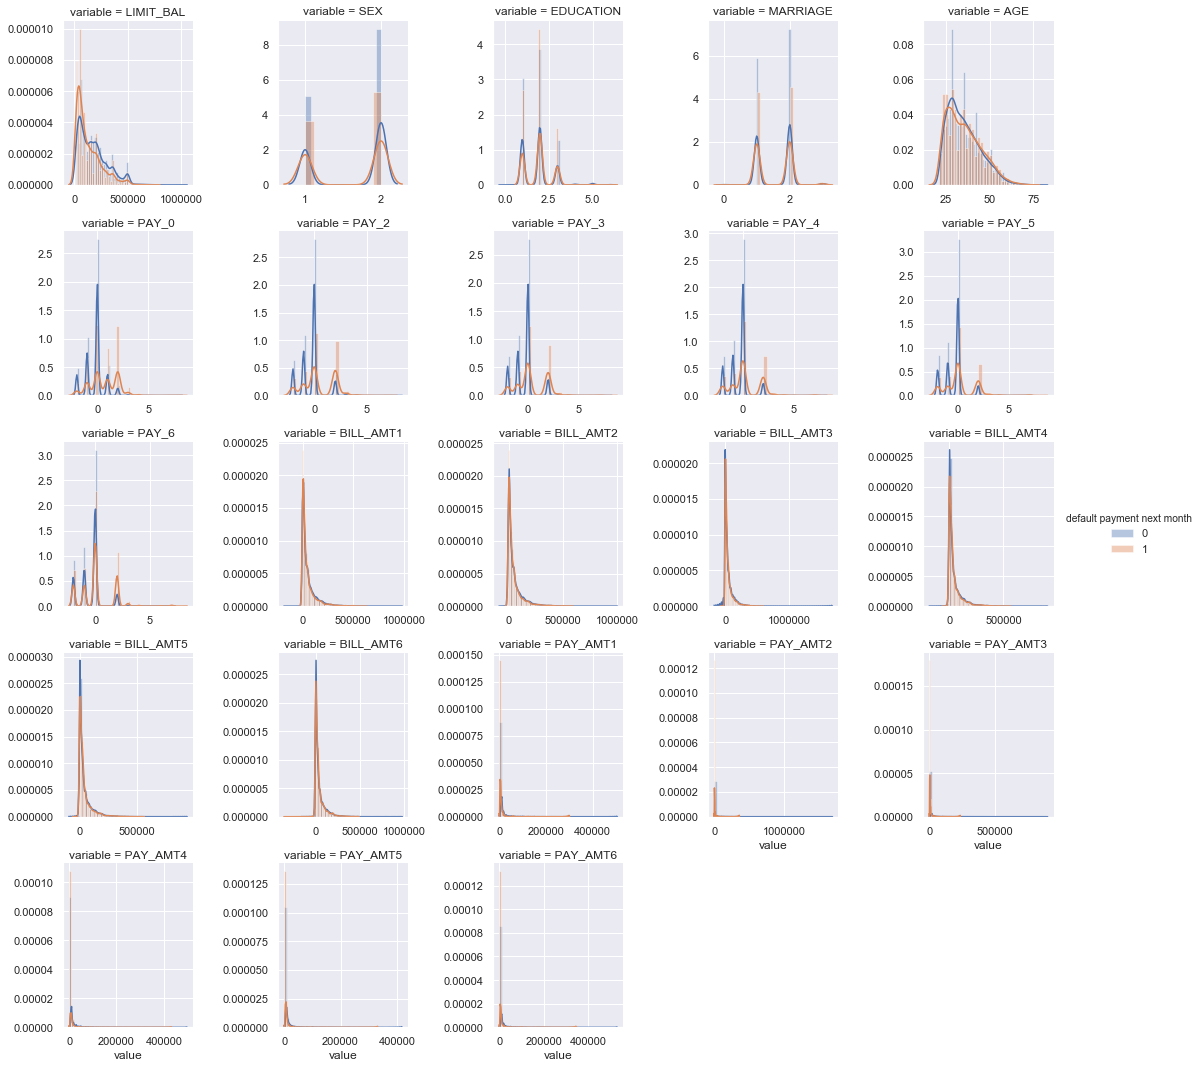

In [211]:
print('Columms:', cols)
print('Basic',basicData)
print('Money',moneyData)

#loggedData = data.drop(columns = cols[:11])
#print(list(loggedData))

# We plot some distibution plot
f = pd.melt(data, id_vars='default payment next month', value_vars= cols)
g = sns.FacetGrid( f, hue='default payment next month', col="variable", col_wrap=5, sharex=False, sharey=False)
g = g.map( sns.distplot, "value", kde=True).add_legend()

 1    21600
-1     2400
Name: 0, dtype: int64


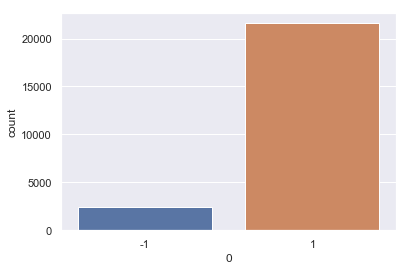

Initially, taking an overview of out data: 

Education is represented as numerical values which each represents a different level of education. We will replace this feature with some dummy categories as the the numbers 1, 2, 3 which represent Grad, Univeristy and High Shool education respecitvly will bring new meaning to these categories due to its mathemticla properties. We can eliminate this by replacing them with binary dummy variables

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5', 'log_PAY_AMT6', 'log_BILL_AMT1', 'log_BILL_AMT2', 'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6']


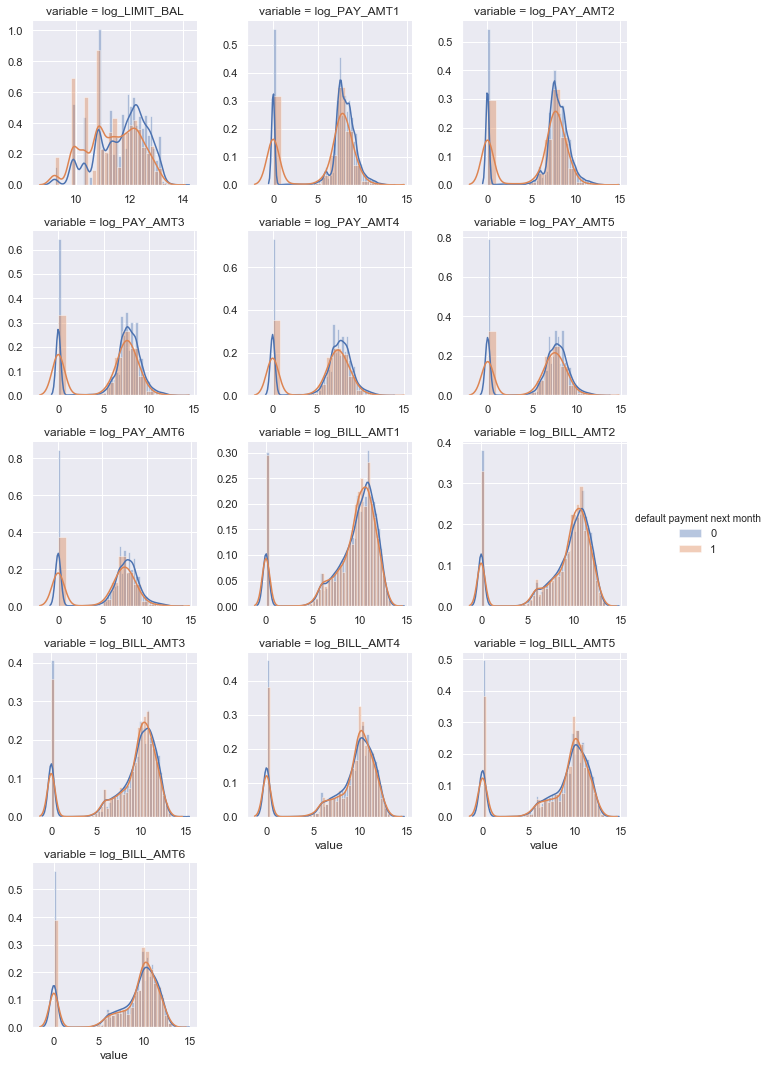

In [214]:
print(cols)
#qual_Enc = cols
#qual_Enc.remove("LIMIT_BAL")
#qual_Enc.remove("AGE")

logged = []
data["log_LIMIT_BAL"] = data["LIMIT_BAL"].apply( lambda x: np.log1p(x) if x>0 else 0)
logged.append("log_LIMIT_BAL")

for ii in range(1,7):
    #qual_Enc.remove("PAY_AMT" + str( ii ))
    data[ "log_PAY_AMT" + str( ii )]  = data["PAY_AMT"  + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_AMT" + str( ii ) )

for ii in range(1,7):
    #qual_Enc.remove("BILL_AMT" + str( ii ))
    data[ "log_BILL_AMT" + str( ii )] = data["BILL_AMT" + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_BILL_AMT" + str( ii ) )

f = pd.melt( data, id_vars='default payment next month', value_vars=logged)
g = sns.FacetGrid( f, hue='default payment next month', col="variable", col_wrap=3, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

logged[1:1] = basicData
#logged.insert(1, basicData)
print(logged)

Methodology Overview

Model training/validation

Results

Final predictions on test set

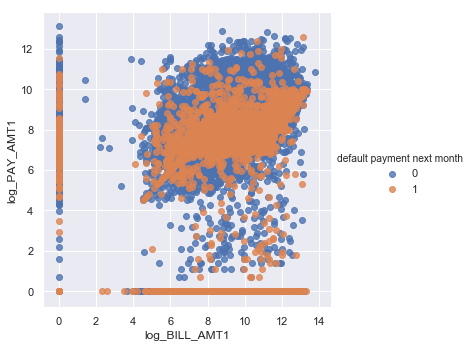

In [215]:
sns.lmplot('log_BILL_AMT1', 'log_PAY_AMT1', data=data, hue='default payment next month', fit_reg=False)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
 1    21600
-1     2400
Name: 0, dtype: int64


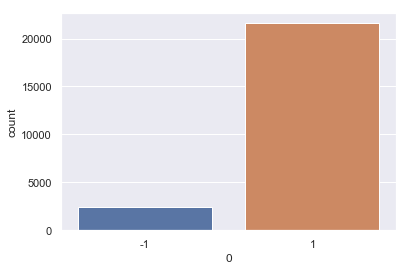

In [212]:
cols.append('default payment next month')
print(cols)

rng = np.random.RandomState(24000)
clf = IsolationForest(max_samples='auto',
                      random_state=rng,)
clf.fit(data[cols])
output_table = pd.DataFrame(clf.predict(data[cols]))
print(output_table[0].value_counts())
ax = sns.countplot(x=output_table[0],data=output_table)
plt.show()

['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_PAY_AMT1', 'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5', 'log_PAY_AMT6', 'log_BILL_AMT1', 'log_BILL_AMT2', 'log_BILL_AMT3', 'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6']
 1    21600
-1     2400
Name: 0, dtype: int64


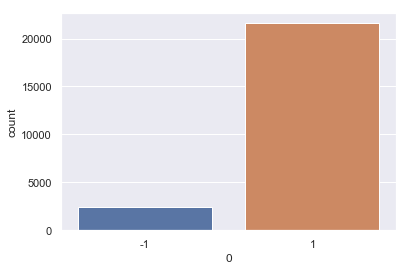

In [216]:
#logged.append('default payment next month')
print(logged)

rng = np.random.RandomState(24000)
clf = IsolationForest(max_samples='auto',
                      random_state=rng,)
clf.fit(data[logged])
output_table = pd.DataFrame(clf.predict(data[logged]))
print(output_table[0].value_counts())
ax = sns.countplot(x=output_table[0],data=output_table)
plt.show()

In [217]:
grad = (data['EDUCATION'] == 1).astype('int')
uni = (data['EDUCATION'] == 2).astype('int')
hs = (data['EDUCATION'] == 3).astype('int') 
data.insert(loc=3, column='GRAD_SCHOOL', value=grad)
data.insert(loc=3, column='UNIVERSITY', value=uni)
data.insert(loc=3, column='HIGH_SCHOOL', value=hs)
data = data.drop(columns = 'EDUCATION')